# Extracción

## Parámetros

In [1]:
BASE_DIR = '/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data' # Mac
# BASE_DIR = r'D:\Users\efras\Documents\EF\Contests\Datathon_CDMX\data' # Windows
RESOURCE_ID = 'e4a9b05f-c480-45fb-a62c-6d4e39c5180e'
FILE_NAME = 'alcaldias'

## Importar

### Clase

In [2]:
from mariachis.alcaldias import Alcaldias

alc = Alcaldias(BASE_DIR, FILE_NAME)
print(alc)

Directorio: 	/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


### Datos desde API

In [3]:
df = alc.full_import(resource_id=RESOURCE_ID)
df.sample()

Archivo: alcaldias.csv fue exportado exitosamente en: /Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,_id,id,nomgeo,cve_mun,cve_ent,cvegeo,geo_point_2d,geo_shape,municipio
9,10,9,lvaro Obregn,10,9,9010,"19.336175562,-99.246819712","{""type"": ""Polygon"", ""coordinates"": [[[-99.1887...",10


## Transformar

In [4]:
alcaldias_posibles = [
    'Azcapotzalco',
    'Benito Juárez', 
    'Coyoacán',   
    'Cuajimalpa de Morelos',   
    'Cuauhtémoc',   
    'Gustavo A. Madero',   
    'Iztacalco',   
    'Iztapalapa',  
    'La Magdalena Contreras', 
    'Miguel Hidalgo',
    'Milpa Alta',   
    'Tlalpan', 
    'Tláhuac',
    'Venustiano Carranza',  
    'Xochimilco', 
    'Álvaro Obregón',
]

In [5]:
gdf = alc.wrangling_alcaldias(df, col_to_correct='nomgeo', correct_list=alcaldias_posibles)
gdf.sample()

Archivo: alcaldias_geoloc.csv fue exportado exitosamente en: /Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,geo_shape,geometry,area,boundary,centroid,convex_hull
nomgeo_correct,,,,,,
Iztapalapa,"{""type"": ""Polygon"", ""coordinates"": [[[-99.0581...","POLYGON ((-99.05813 19.40072, -99.05393 19.398...",0.009768,"LINESTRING (-99.05813 19.40072, -99.05393 19.3...",POINT (-99.05664 19.34911),"POLYGON ((-99.06812 19.28593, -99.07219 19.287..."


<AxesSubplot:>

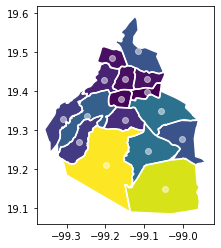

In [6]:
ax = gdf.plot('area')
gdf['centroid'].plot(ax=ax, color='white', alpha=.5)
gdf['boundary'].plot(ax=ax, color='white')